In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

# Data Reading

In [2]:
json_list = []

with open("./review 2.txt", 'r') as f:
    for line in f:
        json_obj = json.loads(line)
        json_list.append(json_obj)

In [3]:
json_list[:1]

[{'ratings': {'service': 5.0,
   'cleanliness': 5.0,
   'overall': 5.0,
   'value': 5.0,
   'location': 5.0,
   'sleep_quality': 5.0,
   'rooms': 5.0},
  'title': '“Truly is "Jewel of the Upper Wets Side"”',
  'text': 'Stayed in a king suite for 11 nights and yes it cots us a bit but we were happy with the standard of room, the location and the friendliness of the staff. Our room was on the 20th floor overlooking Broadway and the madhouse of the Fairway Market. Room was quite with no noise evident from the hallway or adjoining rooms. It was great to be able to open windows when we craved fresh rather than heated air. The beds, including the fold out sofa bed, were comfortable and the rooms were cleaned well. Wi-fi access worked like a dream with only one connectivity issue on our first night and this was promptly responded to with a call from the service provider to ensure that all was well. The location close to the 72nd Street subway station is great and the complimentary umbrellas o

In [4]:
original_df = df = pd.DataFrame(json_list)
original_df.head(3)

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,"December 17, 2012",147643103,False
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,"December 17, 2012",147639004,False
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great Stay”,This is a great property in Midtown. We two di...,"{'username': 'vuguru', 'num_cities': 12, 'num_...",December 2012,1762573,0,"December 18, 2012",147697954,False


In [5]:
original_df.shape

(878561, 10)

# Data Cleaning

## Removing unwanted columns

In [6]:
first_data = original_df.iloc[0]
first_data

ratings              {'service': 5.0, 'cleanliness': 5.0, 'overall'...
title                        “Truly is "Jewel of the Upper Wets Side"”
text                 Stayed in a king suite for 11 nights and yes i...
author               {'username': 'Papa_Panda', 'num_cities': 22, '...
date_stayed                                              December 2012
offering_id                                                      93338
num_helpful_votes                                                    0
date                                                 December 17, 2012
id                                                           147643103
via_mobile                                                       False
Name: 0, dtype: object

In [7]:
first_data['title']

'“Truly is "Jewel of the Upper Wets Side"”'

In [8]:
wanted_df = original_df.copy()
wanted_df['overall_rating'] = wanted_df['ratings'].apply(lambda x: x['overall'])
wanted_df['title'] = wanted_df['title'].apply(lambda x: x.replace('"', '')[1:-1])
wanted_df['text'] = wanted_df['text'].apply(lambda x: x.replace('"', ''))
wanted_df['comments'] = wanted_df['title'] + ' ' + wanted_df['text']
wanted_df['user'] = wanted_df['author'].apply(lambda x: x['username'])
wanted_df['hotel_id'] = wanted_df['offering_id']
wanted_df = wanted_df[['overall_rating', 'comments', 'user', 'hotel_id', 'date_stayed']]

In [9]:
wanted_df.head(2)

,overall_rating,comments,user,hotel_id,date_stayed
0,5.0,Truly is Jewel of the Upper Wets Side Stayed i...,Papa_Panda,93338,December 2012
1,5.0,"My home away from home! On every visit to NYC,...",Maureen V,93338,December 2012


In [10]:
wanted_df.iloc[0]['comments']

'Truly is Jewel of the Upper Wets Side Stayed in a king suite for 11 nights and yes it cots us a bit but we were happy with the standard of room, the location and the friendliness of the staff. Our room was on the 20th floor overlooking Broadway and the madhouse of the Fairway Market. Room was quite with no noise evident from the hallway or adjoining rooms. It was great to be able to open windows when we craved fresh rather than heated air. The beds, including the fold out sofa bed, were comfortable and the rooms were cleaned well. Wi-fi access worked like a dream with only one connectivity issue on our first night and this was promptly responded to with a call from the service provider to ensure that all was well. The location close to the 72nd Street subway station is great and the complimentary umbrellas on the drizzly days were greatly appreciated. It is fabulous to have the kitchen with cooking facilities and the access to a whole range of fresh foods directly across the road at F

## Tokenization

In [11]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matthewkuo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matthewkuo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# stop words
stop = stopwords.words('english')

In [13]:
def clean_text(text):
  text = text.lower()
  return [word.strip(string.punctuation) for word in text.split(" ") if word.strip(string.punctuation) not in stop
          and not word.strip(string.punctuation).isdigit()]
  

test_str = "hello, a, the, teacher is here, 5!"
clean_text(test_str)

['hello', 'teacher']

In [14]:
wanted_df['tokens'] = wanted_df['comments'].apply(clean_text)
wanted_df.head(1)

,overall_rating,comments,user,hotel_id,date_stayed,tokens
0,5.0,Truly is Jewel of the Upper Wets Side Stayed i...,Papa_Panda,93338,December 2012,"[truly, jewel, upper, wets, side, stayed, king..."


## Lemmatization

In [15]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matthewkuo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
len(wanted_df.iloc[0]['tokens'])

106

In [17]:
lemmatizer = WordNetLemmatizer()

wanted_df['tokens'] = wanted_df['tokens'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

# Data Exploration

In [18]:
wanted_df.head(1)

,overall_rating,comments,user,hotel_id,date_stayed,tokens
0,5.0,Truly is Jewel of the Upper Wets Side Stayed i...,Papa_Panda,93338,December 2012,"[truly, jewel, upper, wet, side, stayed, king,..."


## Word Cloud

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [20]:
words = {}
for sublist in wanted_df['tokens']:
    for token in sublist:
        if token in words.keys():
            words[token] += 1
        else:
            words[token] = 1

In [21]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(words)

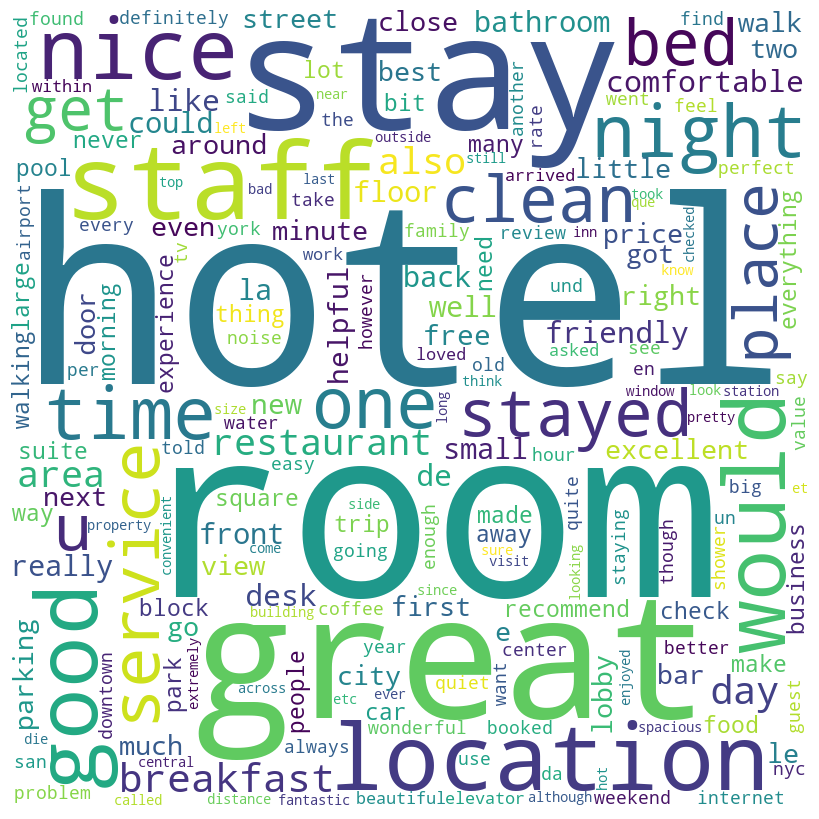

In [23]:
plt.figure(figsize=(12, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Sentiment Analysis

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [27]:
sia = SentimentIntensityAnalyzer()

In [ ]:
wanted_df['sentiment'] = wanted_df['comments'].apply(sia.polarity_scores)

In [36]:
wanted_df['negative_score'] = wanted_df['sentiment'].apply(lambda x: x['neg'])
wanted_df['neutral_score'] = wanted_df['sentiment'].apply(lambda x: x['neu'])
wanted_df['positive_score'] = wanted_df['sentiment'].apply(lambda x: x['pos'])
wanted_df['total_score'] = wanted_df['sentiment'].apply(lambda x: x['compound'])
wanted_df.drop('sentiment', axis=1, inplace=True)

In [37]:
wanted_df.head(3)

,overall_rating,comments,user,hotel_id,date_stayed,tokens,negative_score,neutral_score,positive_score,total_score
0,5.0,Truly is Jewel of the Upper Wets Side Stayed i...,Papa_Panda,93338,December 2012,"[truly, jewel, upper, wet, side, stayed, king,...",0.012,0.715,0.273,0.9968
1,5.0,"My home away from home! On every visit to NYC,...",Maureen V,93338,December 2012,"[home, away, home, every, visit, nyc, hotel, b...",0.000,0.751,0.249,0.9790
2,4.0,Great Stay This is a great property in Midtown...,vuguru,1762573,December 2012,"[great, stay, great, property, midtown, two, d...",0.016,0.767,0.217,0.9770


# Vector Representation

In [39]:
!pip install gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 27.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.1 MB/s eta 0:00:00


In [40]:
# Training the model
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(wanted_df["comments"].apply(lambda x: x.split(" ")))]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [41]:
# Using the model to get the vectors
doc2vec_df = wanted_df["comments"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([wanted_df, doc2vec_df], axis=1)

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(min_df = 100)
tfidf_result = tfidf.fit_transform(reviews_df["comments"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)